In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import json

%matplotlib inline
sns.set(rc={'figure.figsize':(8, 4)})
sns.set(style='white', font_scale=1.2)

#### News

In [40]:
sentiment_stock_data = pd.read_csv("https://media.githubusercontent.com/media/HowardChen123/LLM-Sentimental-Analysis/main/data/raw_datasets/news/Sentiment_Stock_data.csv").iloc[:, 1:]
stock_data = pd.read_csv("https://media.githubusercontent.com/media/HowardChen123/LLM-Sentimental-Analysis/main/data/raw_datasets/news/stock_data.csv")

In [41]:
sentiment_stock_data.head(3)

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."


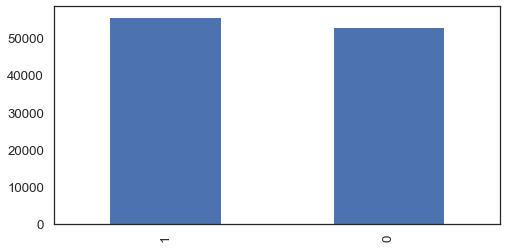

In [42]:
sentiment_stock_data.Sentiment.value_counts().plot(kind='bar');

In [43]:
sentiment_stock_data["Sentiment"] = np.where(sentiment_stock_data["Sentiment"]==1,
                                                "Positive", "Negative")

In [44]:
sentiment_stock_data = sentiment_stock_data.rename(columns={"Sentence": "Text"})

In [45]:
stock_data.head(3)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1


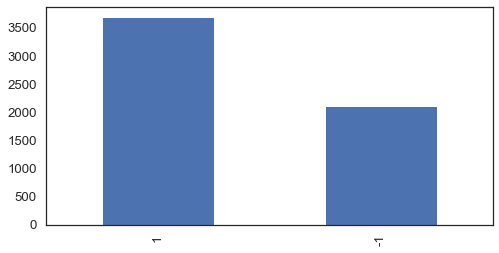

In [46]:
stock_data.Sentiment.value_counts().plot(kind='bar');

In [47]:
stock_data["Sentiment"] = np.where(stock_data["Sentiment"]==1,
                                    "Positive", "Negative")

In [48]:
news_data = pd.concat([sentiment_stock_data, stock_data])

In [49]:
news_data.head(3)

,Sentiment,Text
0,Negative,"According to Gran , the company has no plans t..."
1,Positive,"For the last quarter of 2010 , Componenta 's n..."
2,Positive,"In the third quarter of 2010 , net sales incre..."


In [50]:
news_json = [
    {
        "instruction": "Detect the sentiment of the news.",
        "input": row_dict["Text"],
        "output": row_dict["Sentiment"]
    }
    for row_dict in news_data.to_dict(orient="records")
]

In [54]:
pd.DataFrame(news_json).to_csv("/Users/mac/Desktop/LLM-Sentimental-Analysis/data/processed_datasets/alpaca-news-sentiment-dataset.csv")

#### Tweets

In [ ]:
mbsa_sample_data = pd.read_csv("https://media.githubusercontent.com/media/HowardChen123/LLM-Sentimental-Analysis/main/data/raw_datasets/tweets/mbsa_sample.csv")
stock_sentiment_data = pd.read_csv("https://github.com/HowardChen123/LLM-Sentimental-Analysis/raw/main/data/raw_datasets/tweets/stock_sentiment.csv")

In [ ]:
mbsa_sample_data.head(3)

In [ ]:
mbsa_sample_data.Sentiment.value_counts().plot(kind='bar');

In [ ]:
mbsa_sample_data = mbsa_sample_data[mbsa_sample_data.Sentiment != "Neutral"]

In [ ]:
mbsa_sample_data = mbsa_sample_data.rename(columns={"text": "Text"})

In [ ]:
stock_sentiment_data.head(3)

In [ ]:
stock_sentiment_data.Sentiment.value_counts().plot(kind='bar');

In [ ]:
stock_sentiment_data["Sentiment"] = np.where(stock_sentiment_data["Sentiment"]==1,
                                                "Positive", "Negative")

In [ ]:
tweets_data = pd.concat([stock_sentiment_data, mbsa_sample_data]).drop(columns=["Unnamed: 0", "Date"])

In [ ]:
tweets_data.head(3)

In [ ]:
tweets_json = [
    {
        "instruction": "Detect the sentiment of the tweet.",
        "input": row_dict["Text"],
        "output": row_dict["Sentiment"]
    }
    for row_dict in tweets_data.to_dict(orient="records")
]

In [ ]:
with open("/Users/mac/Desktop/LLM-Sentimental-Analysis/data/processed_datasets/alpaca-tweets-sentiment-dataset.json", "w") as fp:
    json.dump(tweets_json, fp)

In [ ]:
pd.DataFrame(tweets_json).to_csv("/Users/mac/Desktop/LLM-Sentimental-Analysis/data/processed_datasets/alpaca-tweets-sentiment-dataset.csv")